## Generating Substructure (Goodwin and Whitworth, 2003)

Fractal distributions are generated by defining an ur-cube
with side 2, and placing an ur-parent at the centre of the
ur-cube. Next, the ur-cube is divided into N3
div equal subcubes,
and a child is placed at the centre of each sub-cube
(the first generation). Normally we use Ndiv = 2, in which
case there are 8 sub-cubes and 8 first-generation children.
The probability that a child matures to become a parent in
its own right is N(D−3)
div , where D is the fractal dimension; for
lower D, the probability that a child matures to become a parent
is lower. Children that do not mature are deleted, along
with the ur-parent. A little noise is then added to the positions
of the remaining children, to avoid an obviously gridded
structure, and they become the parents of the next generation,
each one spawning N3
div children (the second generation) at the
centres of N3
div equal-volume sub-sub-cubes, and each secondgeneration
child having a probability N(D−3)
div of maturing to become
a parent. This process is repeated recursively until there
is a suciently large generation that, even after pruning to impose
a spherical envelope of radius 1 within the ur-cube, there
are more children than the required number of stars. Children
are then culled randomly until the required number is left, and
the survivng children are identified with the stars of the cluster.

1. define a Cube with side 2 and place a parent in the centre.
2. Devide into $N^{3}_{div}$ (Usually $N_{div}=2$ ) and place a child in each of these.
3. the proability that a child becomes an adult is $N^{D-3}_{div}$, where D is the fractal dimension. (high D higher chance of maturity).
4. Children that di not mature are deleted along with the UR-parent
5. Noise (prehaps gaussian noise) is added to the Child postions (avoids grid structure).
6. These then become the next generation each spawning $N_{div}^{3}$ children.
7. process repeats untill we have a sufficient amount of stars.

In [288]:
import numpy as np
import matplotlib.pylab as plt

N = 1000
D = 1
a = 1 #for simplicity atm
b = 1
c = 1

In [289]:
def Genlen(n):
    return a*(1/2)**n , b*(1/2)**n, c*(1/2)**n

def gen_pos(parent,n,noise):
    
    a,b,c = Genlen(n)
    one = np.array([[-(1/2)*b , -(1/2)*a , -(1/2)*c],
                    [-(1/2)*b , -(1/2)*a ,  (1/2)*c],
                    [-(1/2)*b ,  (1/2)*a , -(1/2)*c],
                    [ (1/2)*b , -(1/2)*a , -(1/2)*c],
                    [ (1/2)*b ,  (1/2)*a ,  (1/2)*c],
                    [ (1/2)*b ,  (1/2)*a , -(1/2)*c],
                    [ (1/2)*b , -(1/2)*a ,  (1/2)*c],
                    [-(1/2)*b ,  (1/2)*a ,  (1/2)*c]])
    noise = noise = np.random.normal(0,0.01, size=(8,3))
    new = np.subtract(one, parent) + noise
    return new

def prob_of_mature(D):
    return 2**(D-3)

def guassian_Noise():
    return np.random.normal(0.1)

def survial(children,D):
    parent = []
    for i in range(0,len(children)):
        rand = np.random.uniform(0,1)
        prob = prob_of_mature(D)
        if rand<= prob:
            parent+=[children[i]]
    return np.array(parent)


In [290]:
gen_number = 0
n = 0
while n < N:
    if n == 0:
        parent = np.zeros(1)
    for i in range(0,len(parent)):
        x = gen_pos(parent[i],gen_number,0)
        if i == 0 and n == 0:
            par = survial(x,D)
        else:
            new = survial(x,D)
            if len(new) == 0:
                break
            else:
                par = np.vstack((par,new))
    parent = par
    n = len(parent)
    gen_number += 1

print(gen_number)
print(n)

print(parent)

51
1013
[[-0.50263235 -0.49409739  0.49849341]
 [ 0.51448606 -0.51432411  0.47864421]
 [-0.49147713  0.50853854  0.50201448]
 ...
 [ 0.32992883 -0.91603352 -0.88930954]
 [ 0.35954057 -0.91502503 -0.91204741]
 [ 0.34837529 -0.90892258 -0.88762995]]


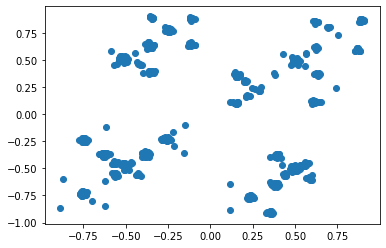

In [291]:
plt.scatter(parent[:,0],parent[:,1])
plt.show()

No handles with labels found to put in legend.


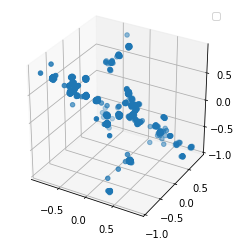

In [292]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(parent[:,0],parent[:,1],parent[:,2])      
ax.set_box_aspect([1,1,1]) #figsize changes to appropriate dimentions
plt.legend()
plt.show()

In [293]:
N = 10

a = 1 #for simplicity atm
b = 1
c = 1


# cube with 2 sides a and b, centerd on 0,0
D = 2
x_0 = gen_pos([0,0,0],0,0)
x_0_sur = []
for i in range(0,len(x_0[:,0])):
    rand = np.random.uniform(0,1)
    prob = prob_of_mature(D)
    if rand <= prob:
        x_0_sur += [x_0[i]]
x_0_cull = np.array(x_0_sur)  
print(x_0_cull)
parent = x_0_cull
new_parent = np.empty(1)
for i in range(0,len(parent)):
    child = gen_pos(parent[i],1,guassian_Noise)
    child_sur = []
    for j in range(0,len(child)):
        rand = np.random.uniform(0,1)
        prob = prob_of_mature(D)
        if rand <= prob:
            child_sur += [child[i]]
    new_parent[i] = np.array(child_sur)
    #print(parent)
print(new_parent)

"""
for i in range(0,len(x_0_cull[:,0])):
    new = gen_pos(x_0_cull[i],1,guassian_Noise)
    new_sur = []
    for i in range(0,len(new[:,0])):
        rand = np.random.uniform(0,1)
        prob = prob_of_mature(D)
        if rand <= prob:
            new_sur += [new[i]] 
    new_gen += [new_sur]
    parent = np.array(new_gen)
print(new_gen)
"""

[[-0.49519211 -0.4795738  -0.50934967]
 [-0.50087832 -0.49268186  0.50311307]
 [-0.49937846  0.49043832 -0.49917611]
 [ 0.49759817  0.49763113  0.49326033]
 [ 0.50299101 -0.5014768   0.48382786]]


ValueError: setting an array element with a sequence.

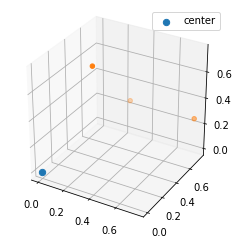

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(0,0,0,label='center',s=40)
ax.scatter(x12[:,0],x12[:,1],x12[:,2])      
ax.set_box_aspect([1,1,1]) #figsize changes to appropriate dimentions

plt.legend()
plt.show()

In [162]:
noise = np.random.normal(0,0.1, size=(8,3))
print(noise)

[[-0.11022739 -0.14361132  0.00894382]
 [ 0.08531122  0.13270465 -0.26043439]
 [ 0.09540568 -0.01799607  0.04051672]
 [ 0.06748257  0.02055169 -0.10677902]
 [ 0.06876079  0.01440693  0.08517275]
 [ 0.06572764  0.13811289 -0.08990744]
 [-0.02647371  0.00985819 -0.06331739]
 [ 0.08749189 -0.10255593 -0.2455935 ]]
